## RDKit Exercise

In this exercise, you will practice the basic use of RDKit in reading molecule, generating SMILE string, calculating fingerprint and molecule descriptors.

The molecule is saved in "molecule.mol".

### 1. Load molecule from file

In this step, load the basic RDKit modules -- `Chem` and `IPythonConsole` to create molecule object from file and draw the molecule.

Solution:

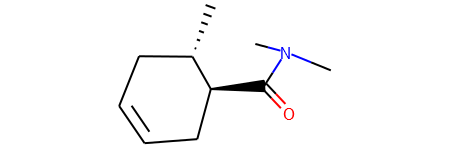

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
mol = Chem.MolFromMolFile('molecule.mol')
mol

### 2. Generate SMILES for molecule

In this step, generate SMILES for the molecule object based on the requirement to label chiral center or not in the SMILES.

(Hint: Function to be used: `Chem.MolToSmiles` with `isomericSmiles = True or False`.)

Solution:

In [2]:
# Label chiral centre
print('Label chiral:')
print(Chem.MolToSmiles(mol, isomericSmiles=True))
print()

# No labelling chiral centre
print('No labelling chiral:')
print(Chem.MolToSmiles(mol, isomericSmiles=False))

Label chiral:
C[C@H]1CC=CC[C@@H]1C(=O)N(C)C

No labelling chiral:
CC1CC=CCC1C(=O)N(C)C


### 3. Atoms, bonds and rings

As the molecule's information is loaded in the memory (the molecule object), you can access atoms, bonds and rings of the molecule. Atoms, bonds and rings are the objects to be retrieved from the molecule object. They have their own attributes and we can use get methods to retrieve these information.

1. Print the atomic index, atomic number and hybrridization by looping over all atoms in the molecule.
(Hint: retrieve atoms from `GetAtoms()` method of the molecule object, then access the atom attributes by `GetIdx()`, `GetAtomicNum()`, `GetHybridization()` of an atom object.)

2. Print bond index and type by looping over all bonds in the molecule.
(Hint: retrieve all bonds from the molecule object by `GetBonds()`, then access the bond attributes by `GetIdx()` and `GetBondType()` of a bond object.)

3. Print atoms index and bonds index in the ring substructure of the molecule.
(Hint: retrieve ring information from the molecule object by `GetRingInfo()`, then access the ring attributes by `AtomRings()` and `BondRings()`.)

Solution:


In [3]:
print('Part 1')
print()
for atom in mol.GetAtoms():
    print('Atom index:', atom.GetIdx())
    print('Atomic number:', atom.GetAtomicNum())
    print('Hybridization:', atom.GetHybridization())
    print()

Part 1

Atom index: 0
Atomic number: 6
Hybridization: SP2

Atom index: 1
Atomic number: 6
Hybridization: SP3

Atom index: 2
Atomic number: 6
Hybridization: SP3

Atom index: 3
Atomic number: 6
Hybridization: SP3

Atom index: 4
Atomic number: 6
Hybridization: SP3

Atom index: 5
Atomic number: 6
Hybridization: SP2

Atom index: 6
Atomic number: 6
Hybridization: SP3

Atom index: 7
Atomic number: 6
Hybridization: SP2

Atom index: 8
Atomic number: 8
Hybridization: SP2

Atom index: 9
Atomic number: 7
Hybridization: SP2

Atom index: 10
Atomic number: 6
Hybridization: SP3

Atom index: 11
Atomic number: 6
Hybridization: SP3



In [4]:
print('Part 2')
print()
for bond in mol.GetBonds():
    print('Bond index:', bond.GetIdx())
    print('Type:', bond.GetBondType())
    print()

Part 2

Bond index: 0
Type: SINGLE

Bond index: 1
Type: DOUBLE

Bond index: 2
Type: SINGLE

Bond index: 3
Type: SINGLE

Bond index: 4
Type: SINGLE

Bond index: 5
Type: SINGLE

Bond index: 6
Type: SINGLE

Bond index: 7
Type: SINGLE

Bond index: 8
Type: DOUBLE

Bond index: 9
Type: SINGLE

Bond index: 10
Type: SINGLE

Bond index: 11
Type: SINGLE



In [5]:
print('Part 3')
print()

ring = mol.GetRingInfo()
print('Atom index:', ring.AtomRings())
print('Bond index:', ring.BondRings())

Part 3

Atom index: ((0, 5, 4, 3, 2, 1),)
Bond index: ((1, 7, 5, 3, 2, 0),)


### 4. Draw molecule with highlighted substructure

Draw the molecule with the highlight on the amide group, carboxyl group and chiral carbon.

Steps: 
1. Select atoms and bonds from the molecule for highlighing, store their index in list.
Use the `MolFromSmarts` to create the substructure pattern, get the atom list to match with the pattern,
select the beginning and ending atoms of the selected bonds, `GetBeginAtomIdx()` and `GetEndAtomIdex()`.
2. Draw molecule in SVG format
Use `rdMolDraw2D.PrepareAndDrawMolecule()` method and pass in the information of drawer, molecule, the selected atoms and bonds. 
3. Display molecule

Solution:


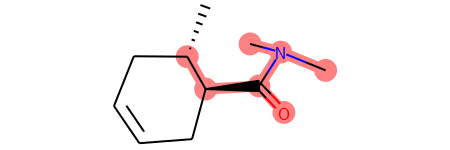

In [6]:
# Original: 'C[C@H]1CC=CC[C@@H]1C(=O)N(C)C'
from rdkit.Chem.Draw import rdMolDraw2D
patt = Chem.MolFromSmarts('[C@H][C@@H]C(=O)N(C)C')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

d = rdMolDraw2D.MolDraw2DSVG(500, 500) # SVG format
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)
mol

### 5. Calculate Fingerprints

Practice the three ways to calculate the Morgan fingerprint of the given molecule. Print the outputs to check if the three fingerprints are the same. 

Hint:

1. Use `AllChem.GetMorganFingerprintAsBitVect()` with the options: useChirality=True, radius=2, nBits=124
2. Use `rdFingerprintGenerator.GetMorganGenerator()` with the options: includeChirality=True, radius=2, fpSize=124, useCountSimulation=False
3. Use `rdMolDescriptors.GetMorganFingerprintAsBitVect()` with the options: useChirality=True, radius=2, nBits=124


Solution:


In [7]:
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
import numpy as np

bv = AllChem.GetMorganFingerprintAsBitVect(mol,useChirality=True, radius=2, nBits=124)
print('AllChem Morgan fingerprint:')
print(np.array(bv))
print()

morgan_fp_gen = rdFingerprintGenerator.GetMorganGenerator(includeChirality=True, radius=2, fpSize=124, useCountSimulation=False)
fp2 = morgan_fp_gen.GetFingerprint(mol)
vec2 = np.array(fp2)
print('rdFingerprintGenerator.GetMorganGenerator:')
print(vec2)
print()

bv2 = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,useChirality=True, radius=2, nBits=124)
print('Chem.rdMolDescriptors Morgan fingerprint:')
print(np.array(bv2))

AllChem Morgan fingerprint:
[0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1]

rdFingerprintGenerator.GetMorganGenerator:
[0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1]

Chem.rdMolDescriptors Morgan fingerprint:
[0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1]


### 6. Calculate molecular descriptors with RDKit

### 6.1 

Practice the use of the `Descriptors` moldule to calculate these properties: TPSA, ExactMolWt, NumValenceElectrons, FpDensityMorgan3, NumHeteroatoms. The document about this common `Descriptors` is [here](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)

Solution:

In [8]:
from rdkit.Chem import Descriptors
print('TPSA:', Descriptors.TPSA(mol))
print('ExactMolWt:', Descriptors.ExactMolWt(mol))
print('NumValenceElectrons:', Descriptors.NumValenceElectrons(mol))
print('FpDensityMorgan3:', Descriptors.FpDensityMorgan3(mol))
print('NumHeteroatoms:', Descriptors.NumHeteroatoms(mol))

TPSA: 20.310000000000002
ExactMolWt: 167.131014164
NumValenceElectrons: 68
FpDensityMorgan3: 2.4166666666666665
NumHeteroatoms: 2


### 6.2 

A more general and wide collection to calculate molecular descriptors is the module `rdkit.Chem.rdMolDescriptors`. It has more than 200 methods to calculate 200 chemical descriptors and their 2D and 3D correlations. Also, it has the methods to calculate the molecule fingerprints available in the RDKit package!

Practice the use of the `rdMolDescriptors` moldule to calculate these properties: Asphericity, NumRings, NumSaturatedRings, NumAmideBonds, and NumHeteroatoms. The document about this common `rdMolDescriptors` is [here](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html)

Solution:

In [9]:
from rdkit.Chem import rdMolDescriptors
print('Asphericity:',rdMolDescriptors.CalcAsphericity(mol))
print('NumRings:', rdMolDescriptors.CalcNumRings(mol))
print('NumSaturatedRings:', rdMolDescriptors.CalcNumSaturatedRings(mol))
print('NumAmideBonds:', rdMolDescriptors.CalcNumAmideBonds(mol))
print('NumHeteroatoms:', rdMolDescriptors.CalcNumHeteroatoms(mol))

Asphericity: 0.33650624153540726
NumRings: 1
NumSaturatedRings: 0
NumAmideBonds: 1
NumHeteroatoms: 2


### 6.3

In the `rdkit.ML.Descriptors.MoleculeDescriptors`, there is a molecule descriptor calculator, which calculate all available descriptors in RDKit and save them in a tuple. 

Practice the use of the `MoleculeDescriptors.MolecularDescriptorCalculator()` method to calculate all descriptors.  The document about this `rdkit.ML.Descriptors.MoleculeDescriptors` is [here](https://www.rdkit.org/docs/source/rdkit.ML.Descriptors.MoleculeDescriptors.html)

Hint: To use `MolecularDescriptorCalculator()`,

1. initilise the calculator by calling `MoleculeDescriptors.MolecularDescriptorCalculator()` and pass in descriptor name list.
2. the descriptor name list is stored in the attribute `rdkit.Chem.Descriptors._descList`. You can use all descriptor names or part of it depending on pratical need.
3. call `CalcDescriptors()` method and pass in molecule object. The calculated results is stored in a tuple.

Solution:

In [10]:
from rdkit.ML.Descriptors import MoleculeDescriptors

# step 1 and 2
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])

# step 3
descriptors200 = calc.CalcDescriptors(mol)

descriptors200

(11.600324074074074,
 0.21296296296296258,
 11.600324074074074,
 0.21296296296296258,
 0.5440026400555292,
 167.25199999999998,
 150.11599999999999,
 167.131014164,
 68,
 0,
 0.22525586113091928,
 -0.34856453570450996,
 0.34856453570450996,
 0.22525586113091928,
 1.3333333333333333,
 1.9166666666666667,
 2.4166666666666665,
 2.6149895698346155,
 196.01526027982132,
 9.137828201504693,
 8.07907652509542,
 8.07907652509542,
 5.625897657686229,
 4.487843366288384,
 4.487843366288384,
 3.7592508570576726,
 3.7592508570576726,
 2.5094083179654123,
 2.5094083179654123,
 1.6261399757201858,
 1.6261399757201858,
 -0.79,
 479.0008718287047,
 9.29920606601249,
 3.7435753105439047,
 1.8720871092969003,
 74.24965164193266,
 4.899909730850478,
 0.0,
 0.0,
 5.907179729351506,
 0.0,
 0.0,
 4.794537184071822,
 0.0,
 0.0,
 0.0,
 19.075777413358388,
 18.75954929201341,
 20.013250011515773,
 0.0,
 4.794537184071822,
 5.907179729351506,
 0.0,
 4.899909730850478,
 11.835812092322787,
 19.765380445542643,
 